# INSURANCE PREMIUM PREDICTIOR

In this project we will be building several model which best fits the provided dataset in order to predict insurance premium based on people medical expenses.

In [3]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#Reading Insurance dataset provided with the project in .csv format, and showing partly how the data looks like
dataset = pd.read_csv('../Dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Findings
#### 1. There is no missing values in any column
#### 2. There are 3 categorical variable
#### 3. Total Number of columns is 1338

<AxesSubplot:>

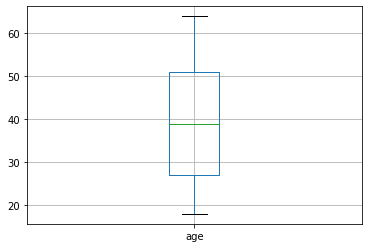

In [7]:
dataset.boxplot("age")
# Finding by seeing boxplot
# 1. Atleast 50% people that are purchasing insurance are between age 27 and 51.
# 2. Median Age is 39.
# 3. The youngest person that have insurance is 18, which could be the minimum age required for insurance.
# 4. Maximum age the people are willing to purchase insurance is 64

<AxesSubplot:>

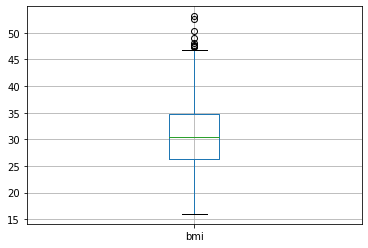

In [8]:
dataset.boxplot("bmi")
#BMI Score and Meaning: <18 : Underweight, 18 to 25 : Normal, 25> : Overweight and obease
# Finding by seeing boxplot
# 1. Atleast 50% people have bmi between 26 and 35 which is overweight and obese category, 
# 2. Atleast 75% people is in the category of overweight or obease and this may imply that overall policyholder could be unhealthy
# 3. Around 25% people have bmi between 26 and and 14, which indicates that people have normal or underweight bmi.
# 4. This box plot have outlier, find the link to understand more about outliers
#    -> https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#    -> https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309

<AxesSubplot:>

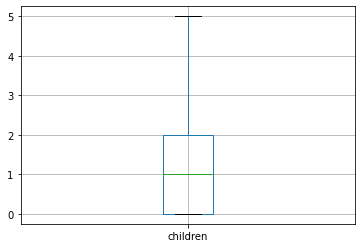

In [9]:
dataset.boxplot("children")
# Finding by seeing boxplot
# 1. Atleast 75% people have 2 child or less.
# 2. Around 25% people have more than 2 children.
# 3. Atleast 50% people have 1 child or less.

<AxesSubplot:>

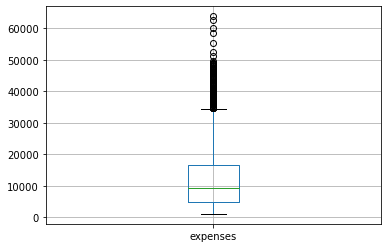

In [10]:
dataset.boxplot("expenses")
#Findings 

<AxesSubplot:title={'center':'expenses'}, xlabel='smoker'>

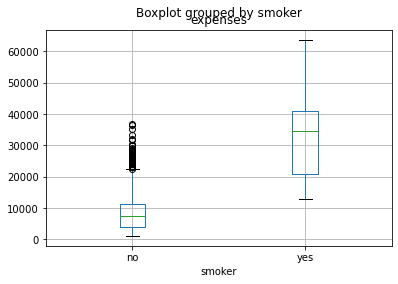

In [11]:
dataset.boxplot("expenses",by="smoker", )
#Findings 

In [12]:
#lets see what could data tell us more
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [13]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [14]:
dataset.cov()

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


In [15]:
dataset.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [16]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Lets find out duplicate values if any

In [17]:
dataset.duplicated().value_counts()

False    1337
True        1
dtype: int64

### There is one duplicate values, we will drop this value

In [18]:
dataset.drop_duplicates(inplace=True)

In [19]:
dataset.duplicated().value_counts()
#Now no duplicate values are there.

False    1337
dtype: int64

<AxesSubplot:>

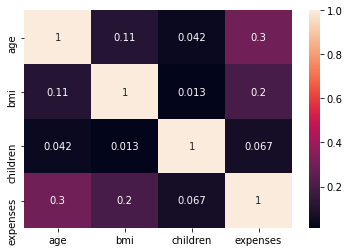

In [20]:
sb.heatmap(dataset.corr(), annot=True)

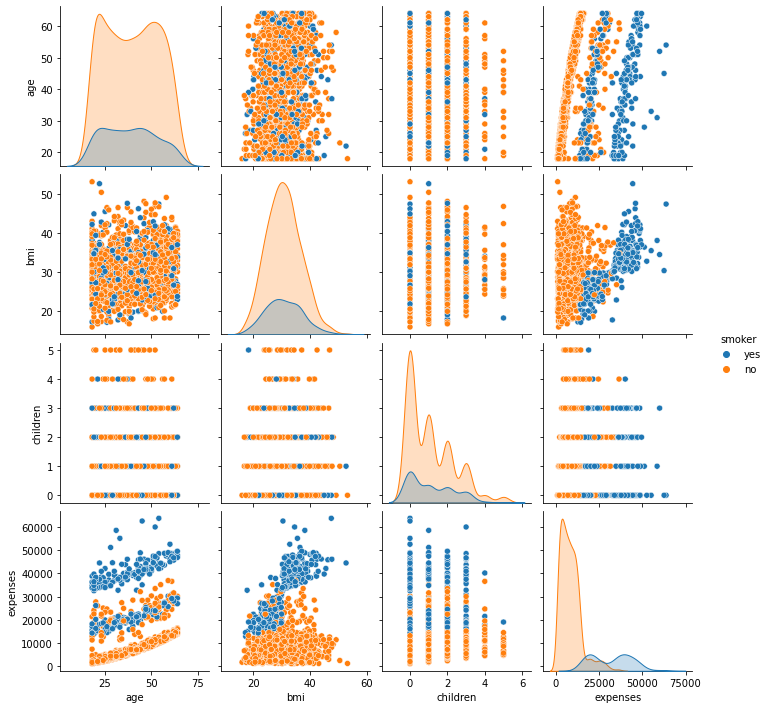

In [21]:
sb.pairplot(dataset, hue="smoker")

## Now lets encode dummy variable. We will perform different encoding techniques and see difference in result if any.

In [22]:
#We know there are 3 categorical variable, which is sex, smoker, region.
#Firstly we will be applying one hot encoding technique to create dummy variables. Also to avoid dummy variable trap, 
# will drop one of the column, probably first one

## One Hot Encoding

In [100]:
# 1. By One hot encoding
dataset_oh = pd.get_dummies(dataset, drop_first=True)

In [101]:
dataset_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [88]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
y = dataset_oh['expenses']
dataset_oh.drop(columns=['expenses'], inplace=True)
X = dataset_oh

## Making our first regression model to predict medical expense

In [10]:
# Dividing our dataset to training and test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [47]:
X_train.count()

age                 891
bmi                 891
children            891
sex_male            891
smoker_yes          891
region_northwest    891
region_southeast    891
region_southwest    891
dtype: int64

In [60]:
y_test.values

array([ 9058.73, 37133.9 , 10923.93,  3070.81,  6406.41,  6186.13,
        7418.52,  7151.09, 10736.87, 28476.73,  9411.01,  2154.36,
        6770.19, 11362.76, 40003.33, 14133.04,  2207.7 , 16115.3 ,
        1967.02,  4185.1 , 13470.86,  5729.01, 39836.52,  4441.21,
        6610.11, 45863.21, 44423.8 ,  4399.73,  9414.92,  2352.97,
       21098.55,  6652.53, 12222.9 ,  4751.07, 10791.96,  6746.74,
       17468.98,  4618.08, 20709.02, 30063.58,  3077.1 ,  7443.64,
        7727.25, 13981.85,  8252.28, 13844.8 ,  4239.89,  6875.96,
        8515.76, 16232.85, 11729.68, 10096.97,  2473.33,  5484.47,
       36149.48,  1242.26, 13405.39,  2597.78,  2200.83,  8240.59,
       18157.88, 16884.92,  1137.47,  9304.7 ,  9800.89,  6311.95,
       42211.14, 29523.17,  2438.06,  5649.72, 14692.67,  3484.33,
       21259.38, 11436.74,  7640.31, 28868.66, 10107.22, 13041.92,
        4518.83,  8556.91, 11763.  , 14410.93,  2322.62, 15230.32,
       30166.62, 32108.66, 13937.67,  3947.41,  9644.25,  5662

In [28]:
dataset.shape[0]*2/3

891.3333333333334

In [29]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

In [30]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [31]:
y_predict = linearModel.predict(X_test)

In [32]:
y_predict.shape

(446,)

In [33]:
linearModel.score(X_test, y_test)
# We are getting 78.2% accuracy using one hot encoding.

0.7420425711102585

## Our first model of linear regression gave an 78.2 % accuracy

## Linear Regression with Cross Validation

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
# parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
mse = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-38116132.99814736


## Ridge Regression

In [103]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
ridge_Regression = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv=5)
# ridge_Regression.fit(X,y)

In [104]:
ridge_Regression.fit(X_train, y_train)

Ridge()

In [105]:
print(ridge_Regression.best_params_)
print(ridge_Regression.best_score_)

AttributeError: 'Ridge' object has no attribute 'best_params_'

In [106]:
ridge_Regression.score(X_test, y_test)

0.7469018090719497

## Lasso Regression

In [113]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameter={'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-35, 1, 5, 10, 15, 20, 25, 50, 75, 100, 150]}
lasso_Regression = GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv=5)
# lasso_Regression.fit(X,y)

In [114]:
lasso_Regression.fit(X_train, y_train)

C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13195942447.755638, tolerance: 10386797.248904923
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13112883555.441124, tolerance: 11223370.21318647
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12094567323.054953, tolerance: 10312568.433061104
  model = cd_fast.enet_coordinate_descent(
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 1e-35, 1, 5, 10,
                                   15, 20, 25, 50, 75, 100, 150]},
             scoring='neg_mean_squared_error')

In [115]:
print(lasso_Regression.best_params_)
print(lasso_Regression.best_score_)

{'alpha': 75}
-37046206.962322906


In [102]:
lasso_Regression.score(X_test, y_test)

0.7469778531980675

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [52]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [53]:
regressor.score(X_test, y_test)

0.6913908855505776

In [55]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

[Text(966.4837670259894, 530.01, 'X[4] <= 0.5\nmse = 149967047.743\nsamples = 891\nvalue = 13524.482'),
 Text(674.201709065891, 502.83000000000004, 'X[0] <= 46.5\nmse = 37652830.067\nsamples = 700\nvalue = 8484.371'),
 Text(407.09998706611714, 475.65000000000003, 'X[0] <= 32.5\nmse = 22641325.277\nsamples = 440\nvalue = 5777.6'),
 Text(251.72119004764886, 448.47, 'X[2] <= 1.5\nmse = 24646769.217\nsamples = 263\nvalue = 4492.461'),
 Text(161.8623160997496, 421.29, 'X[0] <= 22.5\nmse = 19053183.595\nsamples = 191\nvalue = 3612.216'),
 Text(122.9670979410128, 394.11, 'X[2] <= 0.5\nmse = 16294437.864\nsamples = 103\nvalue = 2743.133'),
 Text(83.2575125208681, 366.93000000000006, 'X[6] <= 0.5\nmse = 11375309.851\nsamples = 85\nvalue = 2429.307'),
 Text(48.0008347245409, 339.75, 'X[1] <= 29.1\nmse = 16051218.246\nsamples = 58\nvalue = 2857.203'),
 Text(30.361713967723983, 312.57000000000005, 'X[0] <= 19.5\nmse = 112673.289\nsamples = 27\nvalue = 1816.19'),
 Text(17.941012799109625, 285.39000

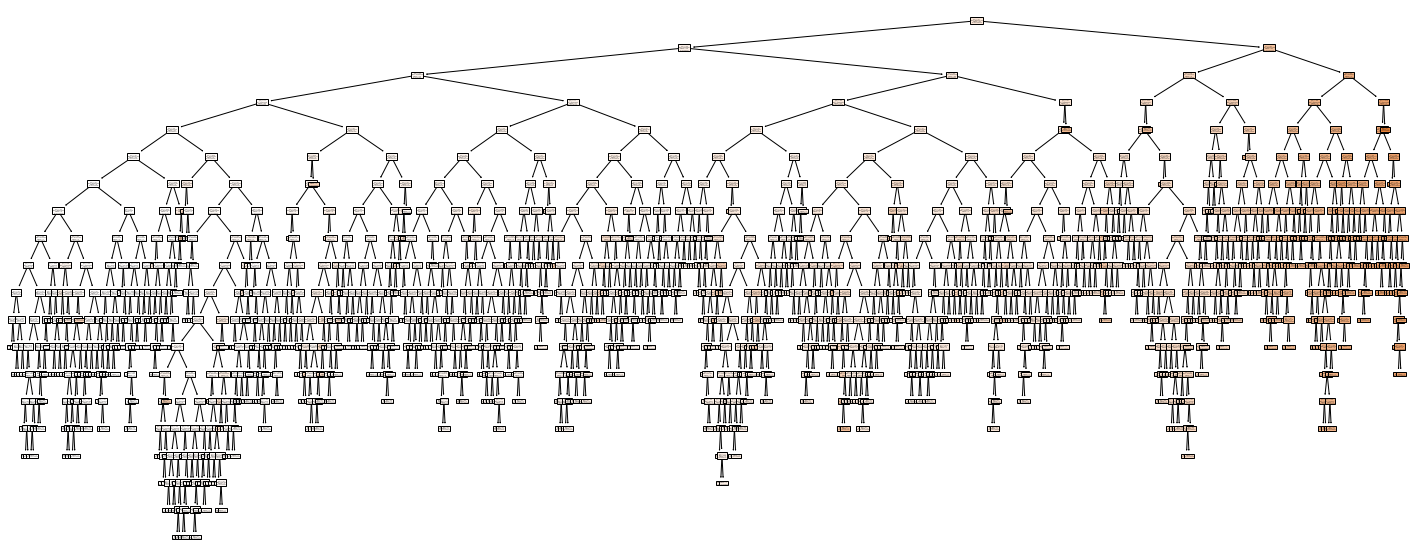

In [119]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(regressor, filled=True)

In [120]:
print(tree.export_text(regressor))

|--- feature_4 <= 0.50
|   |--- feature_0 <= 46.50
|   |   |--- feature_0 <= 32.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 29.10
|   |   |   |   |   |   |   |   |--- feature_0 <= 19.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |  

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13, min_samples_split=20)

In [77]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=20, n_estimators=400,
                      random_state=13)

In [78]:
rf_regressor.score(X_test, y_test)

0.8441438500215881

## KNN Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [71]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [112]:
knn_regressor.score(X_test, y_test)

0.09282591040163957